In [1]:
import keras
import numpy as np
from keras.applications import vgg16

Using TensorFlow backend.


In [2]:
vgg_model = vgg16.VGG16(weights='imagenet')

PIL image size (224, 224)


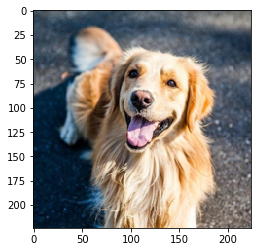

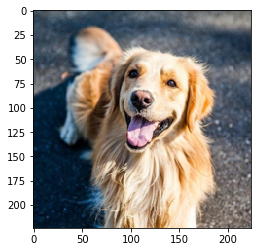

numpy array size (224, 224, 3)
image batch size (1, 224, 224, 3)


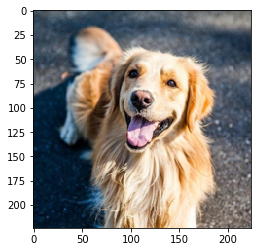

In [5]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
filename = 'test7.jpg'

# load an image in PIL format

#original = load_img(filename, target_size=(224, 224))
#alteration

from PIL import Image
image=Image.open(filename)
image.thumbnail((224,224))


print('PIL image size',image.size)
plt.imshow(image)
plt.show()

 

# convert the PIL image to a numpy array
# IN PIL - image is in (width, height, channel)
# In Numpy - image is in (height, width, channel)

numpy_image = img_to_array(image)
plt.imshow(np.uint8(numpy_image))
plt.show()
print('numpy array size',numpy_image.shape)
# Convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# We want the input matrix to the network to be of the form (batchsize, height, width, channels)
# Thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))


In [6]:
processed_image = vgg16.preprocess_input(image_batch.copy())
predictions = vgg_model.predict(processed_image)
label = decode_predictions(predictions)
print(label) 

[[('n02099601', 'golden_retriever', 0.87640107), ('n02101388', 'Brittany_spaniel', 0.024897056), ('n02102318', 'cocker_spaniel', 0.01109759), ('n02100735', 'English_setter', 0.010571818), ('n02102177', 'Welsh_springer_spaniel', 0.010008727)]]
